Plot saved as /n/holyscratch01/hankyang_lab/workshop/learning_curves.png


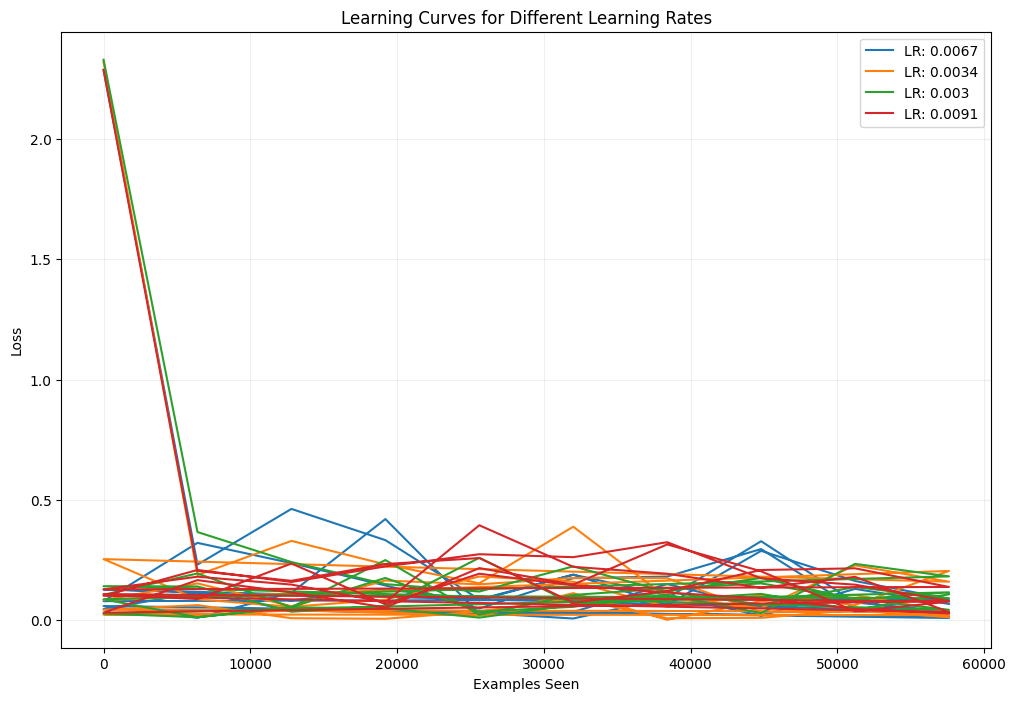

In [2]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

def parse_log_file(file_path):
    learning_rate = None
    losses = []
    batches = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('Training log for learning rate:'):
                learning_rate = float(line.split(':')[1].strip())
            elif line.startswith('Batch:'):
                parts = line.split(',')
                batch = int(parts[0].split(':')[1].strip())
                loss = float(parts[1].split(':')[1].strip())
                batches.append(batch)
                losses.append(loss)
    
    return learning_rate, batches, losses

def plot_learning_curves(log_dir):
    plt.figure(figsize=(12, 8))
    
    for filename in os.listdir(log_dir):
        if filename.endswith('.txt') and filename.startswith('training_log_lr_'):
            file_path = os.path.join(log_dir, filename)
            learning_rate, batches, losses = parse_log_file(file_path)
            
            if learning_rate is not None:
                # Convert batches to total examples seen
                examples = np.array(batches) * 64  # Assuming batch size of 64
                plt.plot(examples, losses, label=f'LR: {learning_rate}')

    plt.xlabel('Examples Seen')
    plt.ylabel('Loss')
    plt.title('Learning Curves for Different Learning Rates')
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.2)
    
    # Save the plot
    plt.savefig(os.path.join(log_dir, 'learning_curves.png'))
    print(f"Plot saved as {os.path.join(log_dir, 'learning_curves.png')}")

# Directory containing the log files
log_dir = '/n/holyscratch01/hankyang_lab/workshop'

# Generate the plot
plot_learning_curves(log_dir)